In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import seaborn as sns

In [2]:
researcher = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/researcher.csv')
mentorship = pd.read_csv('/Users/yanmemgxing/Desktop/my files/2021/mentor-mentee/Qing Ke/fields/mentorship.csv')

In [3]:
researcher.head(3)

,PID,FirstName,MiddleName,LastName,Institution,InstitutionMAGID,ResearchArea,ORCID,MAGAuthorID
0,1,STEPHEN,V,DAVID,Oregon Health and Science University,165690674.0,"neuro,csd,bme",0000-0003-4135-3104,2.171828e+09
1,2,BENJAMIN,Y,HAYDEN,"University of Minnesota, Twin Cities",130238516.0,neuro,0000-0002-7678-4281,2.082173e+09
2,3,JACK,L,GALLANT,"University of California, Berkeley",95457486.0,"neuro,psych",NaN,2.110166e+09


In [4]:
#统计领域 总人数前 10 大领域 （top 10 fields）
fields = researcher.ResearchArea
all_fields = []          #包含作者所在的多个领域 (researchers could be in different fields)
for k in fields:
    tp = k.split(',')
    all_fields.append(tp)
#看哪些领域数据比较多 (the fields include more data)
FD = []
for k in all_fields:
    FD.extend(k)
FD = dict(Counter(FD))
a = sorted(FD.items(),key = lambda i:i[1],reverse=1)
a[:10]

[('neuro', 135756),
 ('chemistry', 104450),
 ('etree', 56898),
 ('educ', 56580),
 ('physics', 49582),
 ('math', 35651),
 ('literature', 28257),
 ('sociology', 25453),
 ('econ', 23497),
 ('computerscience', 22399)]

In [5]:
files_field = os.listdir('./fields')
files_field = ['chemistry.csv','neuro.csv','physics.csv','etree.csv','math.csv',
              'econ.csv','cellbio.csv','computerscience.csv','literature.csv','educ.csv']
print(files_field)
fields_rl = {}
for item in files_field:
    tp = pd.read_csv('./fields/'+item)
    tn = item.split('.')[0]
    fields_rl[tn] = tp

['chemistry.csv', 'neuro.csv', 'physics.csv', 'etree.csv', 'math.csv', 'econ.csv', 'cellbio.csv', 'computerscience.csv', 'literature.csv', 'educ.csv']


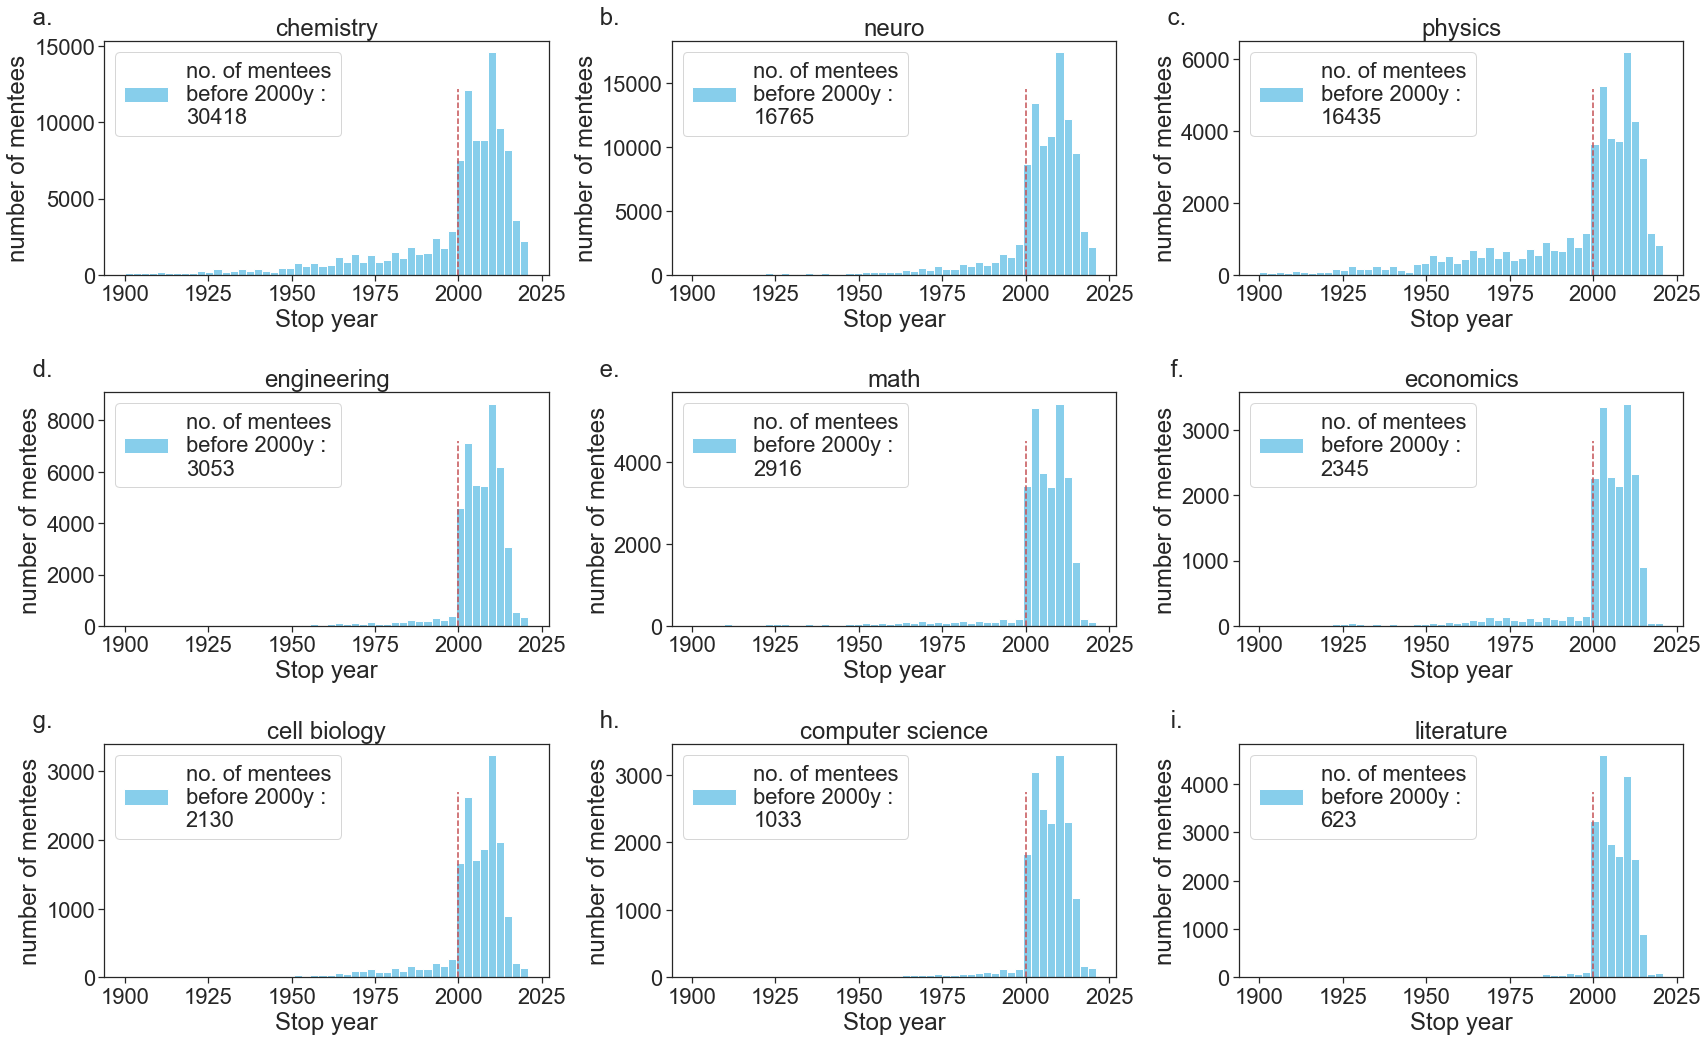

In [12]:
font = { 'weight': 'bold',
         'size': 10,
         }
l_index = [' a. ',' b. ',' c. ',' d. ',' e. ',' f. ',' g. ',' h. ',' i. ',' j. ',' k. ',' l. ']
fig = plt.figure(figsize=(24,15))#figsize=(10,3.5)
sns.set(style='ticks', font_scale=2, font='Arial')
keys = list(fields_rl.keys())
for i in range(1,10):
    ax = fig.add_subplot(3,3,i)                          
    fn = keys[i-1]                                        
    fd = fields_rl[fn]                                    
    tp_sy = fd.StopYear[fd.StopYear!=-1]                  
    tp_sy2000 = tp_sy[tp_sy<2000]
    a = ax.hist(tp_sy,range=[1900,2021],bins=50,color='skyblue',
                label='no. of mentees\nbefore 2000y : \n'+ str(len(tp_sy2000)))
    thrd = max(a[0])/1.2
    ax.plot([2000,2000],[0,thrd],c='r',ls='--')
    if fn=='etree':
        fn = 'engineering'
    elif fn=='econ':
        fn = 'economics'
    elif fn=='cellbio':
        fn = 'cell biology'
    elif fn=='educ':
        fn = 'education'
    elif fn=='computerscience':
        fn = 'computer science'
    else:
        fn = fn
    ax.set_title(fn)
    ax.legend()
    ax.set_xlabel('Stop year')
    ax.set_ylabel('number of mentees')
    ax.text(-0.14, 1.1,l_index[i-1],ha='center', va='center', transform=ax.transAxes)

fig.tight_layout()
fig.savefig('./mentee among fields.pdf')